In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import cv2
import matplotlib.pyplot as plt
import os
data=[]
labels=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if (len(str(os.path.join(dirname,filename)).split('/'))>5):
            #print(os.path.join(dirname, filename))
            img=cv2.imread(os.path.join(dirname,filename))
            img=cv2.resize(img,(64,64))
            label=str(os.path.join(dirname,filename)).split('/')[-2]
            data.append(img)
            labels.append(label)
            

# Any results you write to the current directory are saved as output.

In [19]:
print(len(data))
print(data[0].shape)

6000
(64, 64, 3)


In [20]:
len(labels)

6000

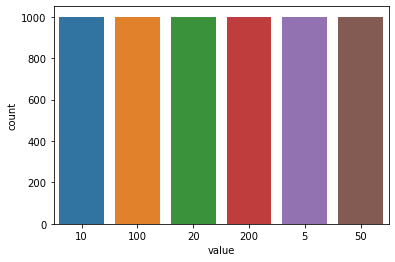

In [21]:
import seaborn as sns
sns.countplot(data=pd.DataFrame(labels,columns=['value']),x='value')
plt.show()

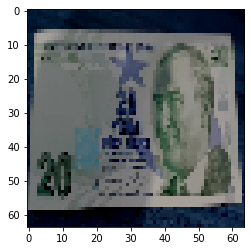

In [22]:
plt.imshow(data[0])

In [23]:
image=[]
for i in data:
    image.append((i/255.0).reshape(64*64*3))

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(image,labels,random_state=101,test_size=0.25)

In [25]:
from sklearn.svm import SVC
model=SVC(kernel='rbf')

In [26]:
model.fit(X_train,y_train)
y_ptr=model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [28]:
print(accuracy_score(y_test,y_ptr))

0.9333333333333333


In [29]:
print(confusion_matrix(y_test,y_ptr))

[[224   0   2   0   2   6]
 [  4 230   5   1  10   0]
 [  3   9 243   2   2   3]
 [  5   2   6 244   0   1]
 [ 10   0   2   2 227   1]
 [ 15   0   3   3   1 232]]


In [30]:
print(classification_report(y_test,y_ptr))

              precision    recall  f1-score   support

          10       0.86      0.96      0.91       234
         100       0.95      0.92      0.94       250
          20       0.93      0.93      0.93       262
         200       0.97      0.95      0.96       258
           5       0.94      0.94      0.94       242
          50       0.95      0.91      0.93       254

    accuracy                           0.93      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.94      0.93      0.93      1500

